### *PhotoDissociation Region Toolbox Notebooks*
-------------------------------------------------------------

# Example 5: Exploring Models

This example shows use the PDRT Toolbox to explore models of ratio or intensity and optionally plot your observations on top. The main class for this is ModelPlot.


In [1]:
from pdrtpy.modelset import ModelSet
from pdrtpy.plot.modelplot import ModelPlot
from pdrtpy.measurement import Measurement
import pdrtpy.pdrutils as utils
from astropy.nddata import StdDevUncertainty
import astropy.units as u

### First, load up a set of models. Here use the Wolfire/Kaufman 2020 models.

In [2]:
ms = ModelSet(name="wk2020",z=1)
# Display all the available ratio and intensity model files. Files that have denominator = 1 are intensities. 
ms.table.show_in_notebook()

idx,numerator,denominator,ratio,filename,z,title
,,,,,,null
0,OI_63,CII_158,OI_63/CII_158,OI63_CII158sm,1.0,[O I] 63 $\mu$m / [C II] 158 $\mu$m
1,OI_63+CII_158,FIR,OI_63+CII_158/FIR,OI63+CII158_FIRsm,1.0,([O I] 63 $\mu$m + [C II] 158 $\mu$m) / I$_{FIR}$
2,OI_145+CII_158,FIR,OI_145+CII_158/FIR,OI145+CII158_FIRsm,1.0,([O I] 145 $\mu$m + [C II] 158 $\mu$m) / I$_{FIR}$
3,OI_145,OI_63,OI_145/OI_63,OI145_OI63sm,1.0,[O I] 145 $\mu$m / [O I] 63 $\mu$m
4,CI_370,CI_609,CI_370/CI_609,CI370_CI609sm,1.0,[C I] 370 $\mu$m / [C I] 609 $\mu$m
5,CII_158,CI_609,CII_158/CI_609,CII158_CI609sm,1.0,[C II] 158 $\mu$m / [C I] 609 $\mu$m
6,CII_158,OI_145,CII_158/OI_145,CII158_OI145sm,1.0,[C II] 158 $\mu$m / [O I] 145 $\mu$m
7,CII_158,FIR,CII_158/FIR,CII158_FIRsm,1.0,[C II] 158 $\mu$m / I$_{FIR}$
8,CII_158,CO_10,CII_158/CO_10,CII158_CO10sm,1.0,[C II] 158 $\mu$m / CO(J=1-0)


In [3]:
ms.supported_intensities.show_in_notebook()

idx,title,intensity label
,null,
0,[C I] 609 $\mu$m,CI_609
1,[C II] 158 $\mu$m,CII_158
2,[O I] 63 $\mu$m,OI_63
3,[O I] 145 $\mu$m,OI_145
4,CO(J=1-0),CO_10
5,CO(J=2-1),CO_21
6,CO(J=3-2),CO_32
7,CO(J=4-3),CO_43
8,CO(J=5-4),CO_54


### Instantiate a ModelPlot class using the ModelSet you just created.

In [4]:
mp = ModelPlot(ms)

###  Plot a particular model. 
You identify the model you want using the 'ratio' label in the table above

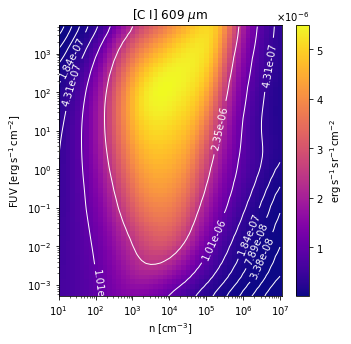

In [5]:
mp.plot("CI_609",legend=False,contours=True,label=True)

### The same plot with native LaTeX formatting
This is how to enable LaTeX formatting in text components.  All PDRT plotting tools have this option.  It changes the font and the way the colorbar scale factor is shown.

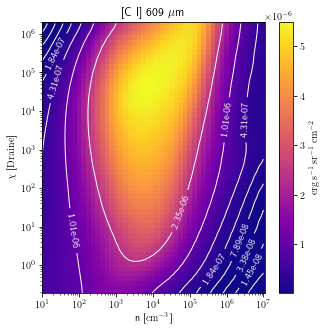

In [6]:
mp.usetex(True)
mp.plot("CI_609",legend=False,contours=True,label=True,yaxis_unit="Draine")

### Plot another one.  Add a few keywords for fancification.

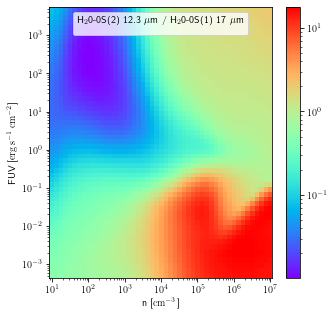

In [7]:
mp.plot("H200S2/H200S1",legend=True,cmap='rainbow',norm='log',contours=False)

### Get all the models that match CO(2-1), CO(4-3), and CI 609 micron and plot them. 
The `model_type` 'both' means get both ratios and intensities.  You could also ask for just 'ratio' or 'intensity'

Found models:  dict_keys(['13CO_10', 'CO_21', 'CI_609', 'CO_43', 'CI_609/CO_21', 'CI_609/CO_43', 'CI_609/13CO_10', 'CO_43/CO_21'])


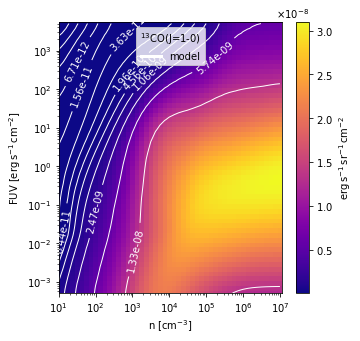

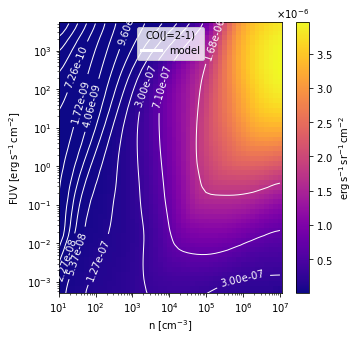

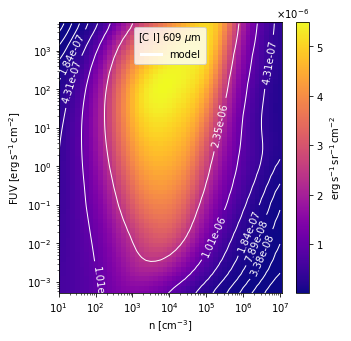

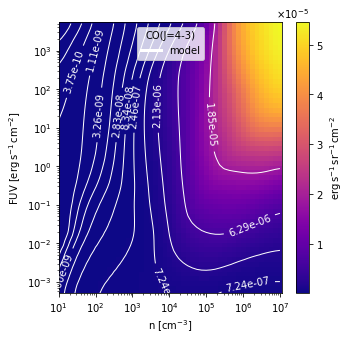

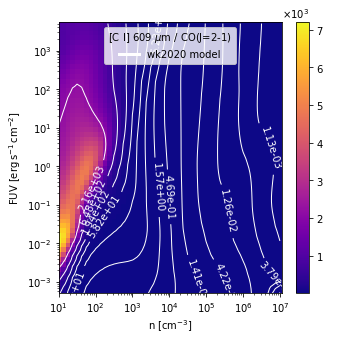

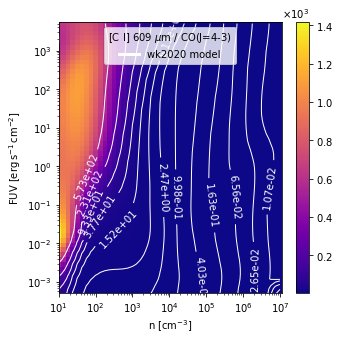

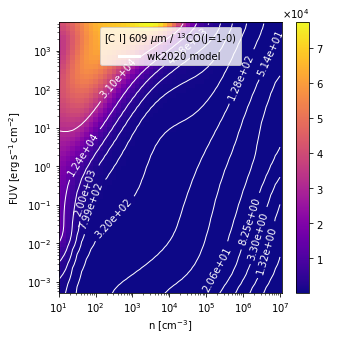

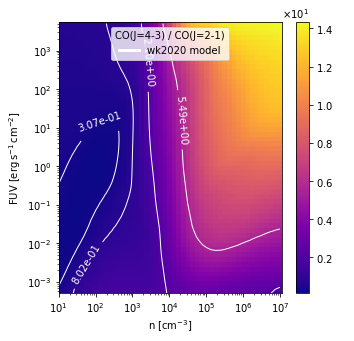

In [8]:
mp.usetex(False)

z=ms.get_models(["CI_609","CO_21","CO_43","13CO_10"],model_type="both")
print("Found models: ",z.keys())
for j in z:
    mp.plot(j,label=True,norm='zscale')

### What if you want to plot observations on the models?
First create some Measurements to represent your observations.

In [9]:
myunit = "erg s-1 cm-2 sr-1"
mx=Measurement(data=[2.5E-6],uncertainty = StdDevUncertainty(0.5E-6),identifier="CI_609",unit=myunit)
my=Measurement(data=[2],uncertainty = StdDevUncertainty(1),identifier="CII_158/CI_609",unit=myunit)
mz=Measurement(data=[3E-6],uncertainty = StdDevUncertainty(0.5E-6),identifier="CII_158",unit=myunit)
mq=Measurement(data=[2.3],uncertainty=StdDevUncertainty(0.5),identifier='CO_43/CO_21')
a = [mx,my,mz,mq]

## The `overlay` method will plot one or more Measurements in the density-radiation field space.  
The errors are indicated with shading. Note you can pass it both ratios and intensities for the Measurements. The keywords `xlim` and `ylim` allow control of axis limits.

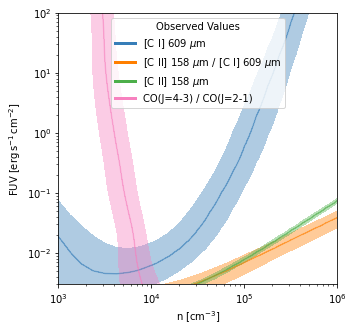

In [10]:
mp.overlay(measurements=a,yaxis_unit="erg s-1 cm-2",ylim=[3E-3,1E2],xlim=[1E3,1E6])

### You can overlay a observation on a model.
Simply pass a Measurement into the `plot` method.

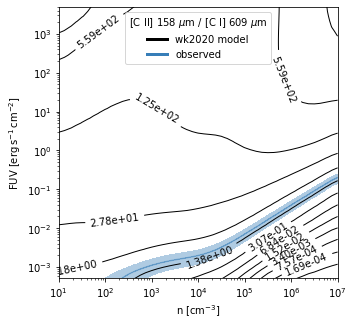

In [11]:
mp.plot("CII_158/CI_609",image=False,measurements=[my],legend=True,label=True)

### Don't like the default colors?  Use your own!

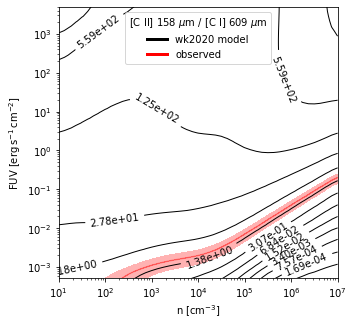

In [12]:
mp.plot("CII_158/CI_609",image=False,measurements=[my],legend=True,label=True,meas_color='red',shading=0.3)

### Here is an example plotting only intensities.
The code is smart enough to convert ${\rm K~km~s^{-1}}$ to intensity units (as long as the Measurement has a RESTFREQ in the FITS header or given during creation) and change the legend label as appropriate.

Converting K km/s to erg / (cm2 s sr) using Factor = +3.396E-07 g / (cm K s2)


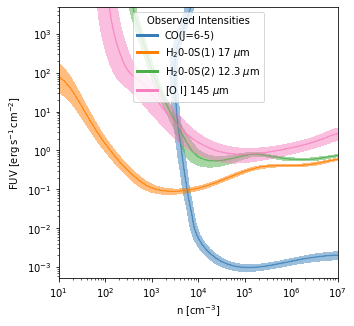

In [13]:
ma=Measurement(data=0.75,uncertainty = StdDevUncertainty(0.3),
               identifier="CO_65",unit="K km s-1",restfreq=692*u.GHz)
mb=Measurement(data=[1E-6],uncertainty = StdDevUncertainty(0.25E-6),
               identifier="H200S1",unit=myunit)
mc=Measurement(data=[2E-6],uncertainty = StdDevUncertainty(0.5E-6),
               identifier="H200S2",unit=myunit)
md=Measurement(data=[1.25E-4],uncertainty = StdDevUncertainty(0.5E-4),
               identifier="OI_145",unit=myunit)
a = [ma,mb,mc,md]
mp.overlay(measurements=a,shading=0.5)

### Finally, plot them using Draine units on the Y-axis and with dashed lines indicating errors rather than shading.

Converting K km/s to erg / (cm2 s sr) using Factor = +3.396E-07 g / (cm K s2)


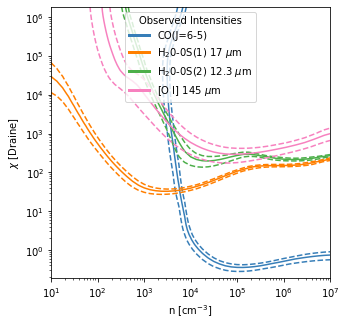

In [14]:
mp.overlay(measurements=a,yaxis_unit='Draine',shading=0)

## You can plot the phase space coverage of model intensities and ratios.
These show lines of constant density and radiation field as a function of line intensity or intensity ratio from the models. These can be useful for making predictions of line strength or estimating density and radiation field when you don't have enough lines to fit with the LineRatioFit tool. The <code>phasespace</code> method takes two identifier strings and plots the (density, radiation field) model phase space for those lines.  Below are 3 examples.

In [15]:
# Two ratios
identifiers1 = ["OI_63+CII_158/FIR","OI_63/CII_158"]
# Two intensities
identifiers2 = ["CO_21","OI_63"]
# An intensity and a ratio
identifiers3 = ["CI_609/CO_43","CII_158"]

### Use keywords to control the plots
The `reciprocal` keyword controls whether to invert a model ratio before plotting, one boolean per axis.  In this case, the model is stored as \[O I\] 163$\mu$m/\[C II\] 158$\mu$m but we want \[C II\] 158$\mu$m/\[O I\] 63$\mu$m, so we set the y-axis `reciprocal` value to `True`.  You can limit the range of $n$ and $G_0$ plotted with the `nax1_clip` (NAXIS1) and `nax2_clip` (NAXIS2) keywords, which take astropy Quantities as their values.  Figures can be saved in common formats with `savefig`. 

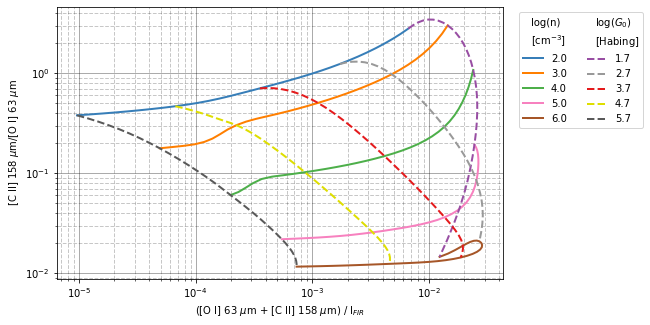

In [16]:
mp.phasespace(identifiers1,reciprocal=[False,True],
              nax1_clip=[100,1E6]*u.Unit("cm-3"),
              nax2_clip=[10,1E6]*utils.habing_unit)
mp.savefig("CII_OI_FIR.png")

### Displayed model units are controlled by the clipping keywords.
In this example, setting the `nax2_clip` Quantity units to erg s$^{-1}$ cm$^{-2}$ changes the units of the model radiation field.

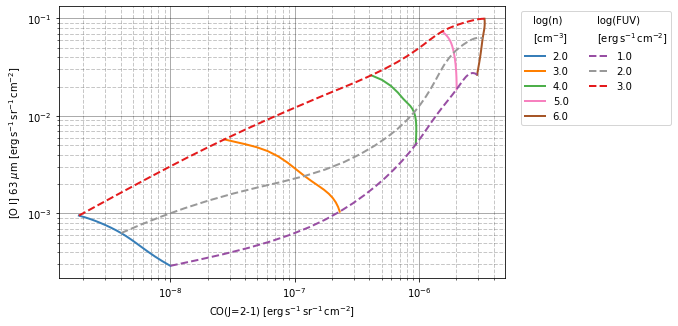

In [17]:
mp.phasespace(identifiers2,reciprocal=[False,False],
              nax1_clip=[100,1E6]*u.Unit("cm-3"),
              nax2_clip=[1,1E4]*utils._RFS_UNIT_)
mp.savefig("OI_CO21.png")

### You can mix ratios and intensities in phase space plots.
Note here we also use Draine units for the radiation field.

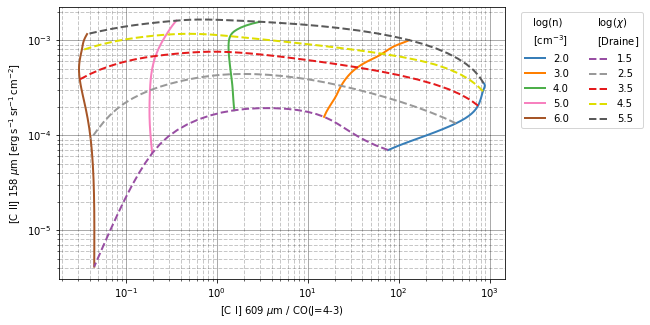

In [18]:
mp.phasespace(identifiers3,reciprocal=[False,False],
              nax1_clip=[100,1E6]*u.Unit("cm-3"),
              nax2_clip=[10,1E6]*utils.draine_unit)
mp.savefig("CI_CO_CII.png")

#### Here's an example showing that surface temperature is an available model.
$H_2$ line intensity vs. $T_{surface}$

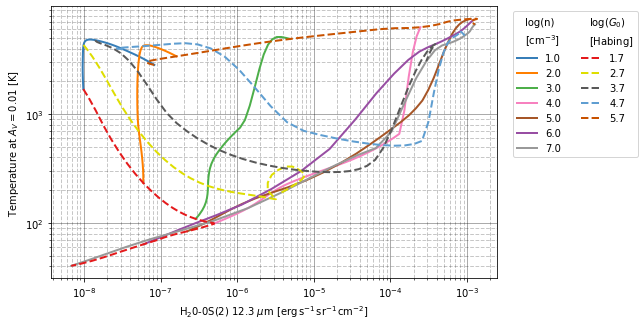

In [19]:
mp.phasespace(["H200S2","TS"])

### Phase space plots also work for ionized gas models
The ionized gas models are computed as a function of electron temperature $T_e$ and electron density $n_e$.  This example also shows how to add a single data point to the plot using the `measurements` keyword. 

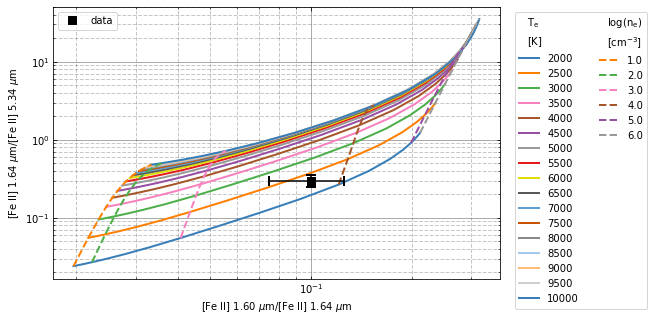

In [20]:
m1 = Measurement(data=[0.1],uncertainty = StdDevUncertainty(0.025),identifier="FEII_1.60/FEII_1.64",unit="")
m2 = Measurement(data=[0.3],uncertainty = StdDevUncertainty(0.05),identifier="FEII_1.64/FEII_5.34",unit="")
mp.phasespace(['FEII_1.60/FEII_1.64','FEII_1.64/FEII_5.34'],nax2_clip=[10,1E6]*u.Unit("cm-3"),nax1_clip=[2E3,1E4]*u.Unit("K"),measurements=[m1,m2],errorbar=True)
mp.savefig("Ironlines.png")

### You can modify any figure through `matplotlib` methods
All plot classes provide access to the underlying matplotlib Figure and AxesSubplot references in the`figure` and `axis` member variables. This is useful to change things that are not accessible through class plot keywords. In this example, we change the axes labels and move the legend.  To replot the figure, simply reference it in a cell. Note the use of "r" in the strings to correctly process LaTeX.

In [21]:
mp.axis.set_ylabel(r"Iron line 1.64/5.34 $\mu$m ratio")
mp.axis.set_xlabel(r"Iron line 1.60/1.64 $\mu$m ratio")
mp.axis.legend_.set_bbox_to_anchor((1.01,0.83))

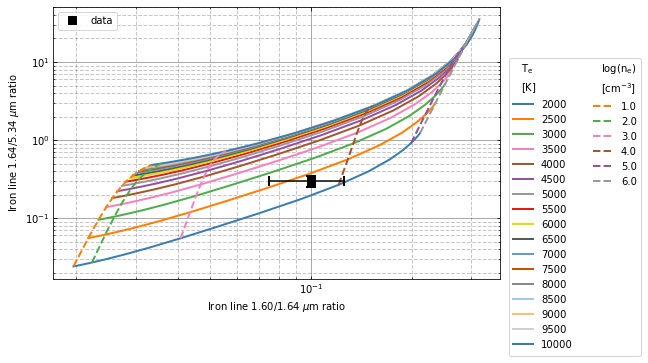

In [22]:
mp.figure

can## Adding data points to a phase space plot
To plot many data points on a phase space diagram, you need to have your data as `Measurements.` Recall that a single `Measurement` instance can contain a data and uncertainty arrays.  The `measurement` keyword in `phasespace()` can take pairs of Measurements that contain data for the `x` and `y` axes of the plot.  For each `x,y` pair of Measurements, you can also supply a data label and plot point [matplotlib format specifier.](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)

The easiest way to create a `Measurement` containing a 1-D array of data points is to read them in from an [Astropy Table](https://docs.astropy.org/en/stable/table/index.html) using [*Measurement.from_table()*.](http://pdrtpy.readthedocs.io/en/latest/pdrtpy.measurement.html#pdrtpy.measurement.Measurement.from_table)  

Below is an example using \[C II\], CO(3-2), and FIR data on the source RCW 49 from [Tiwari et al. 2021.](https://ui.adsabs.harvard.edu/abs/2021ApJ...914..117T/abstract)  First we read in the data from files containing \[C II\]/FIR and \[C II\]/CO(3-2) intensity ratios and uncertainties for 4 regions in RCW 49, placing the Measurements in a Python `list`. The order in which you add them to the list doesn't matter: `phasespace()` will assign them to the correct axes based on the `identifier` columns in the tables. In this example, the tables are in IPAC format, but any Astropy supported table format is acceptable.  We also set the data labels and plot format specifiers.

In [23]:
rcw49 = []
label = ["shell","pillar","northern cloud","ridge"]
format_ = ["k+","b+","g+","r+"]
for region in ["shell","pil","nc","ridge"]:
    f1 = f"../data/cii-fir-{region}-tab.txt"
    f2 = f"../data/cii-co-{region}-tab.txt"
    #f3 = f"../data/cii-oi-{region}-tab.txt"
    rcw49.append(Measurement.from_table(f1))
    rcw49.append(Measurement.from_table(f2))

Then we create the phase space diagram passing in the `list` of `Measurements `, the labels and formats.

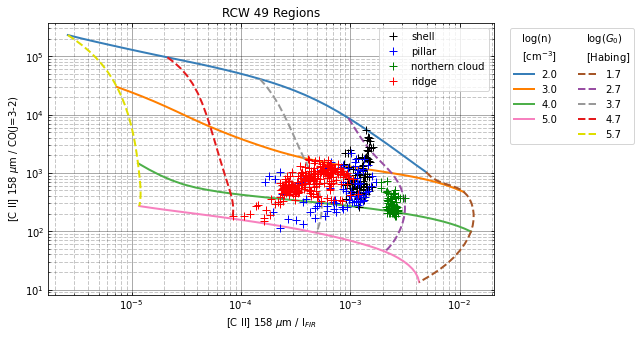

In [24]:
mp.phasespace(['CII_158/FIR','CII_158/CO_32'],nax1_clip=[1E2,1E5]*u.Unit("cm-3"),
               nax2_clip=[1E1,1E6]*utils.habing_unit, measurements=rcw49,label=label,
               fmt=format_,title="RCW 49 Regions")

mp.savefig("cii_co_fir_pdrt_fixedG0.png",dpi=1200)

#### Don't like the default color scheme? Change it! Don't like the grid? Turn it off!

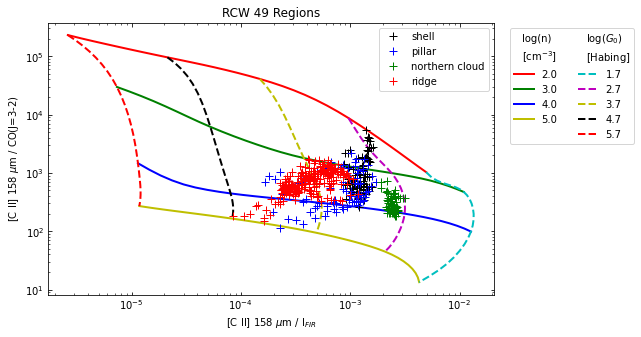

In [25]:
newcycle = ['r', 'g', 'b', 'y','c','m','y','k']
mp.colorcycle(newcycle)
mp.phasespace(['CII_158/FIR','CII_158/CO_32'],nax1_clip=[1E2,1E5]*u.Unit("cm-3"),
               nax2_clip=[1E1,1E6]*utils.habing_unit, measurements=rcw49,label=label,
               fmt=format_,title="RCW 49 Regions", grid=False)

## You can make isocontour plots of individual model parameters
Related to the phasespace plot is the `isoplot`, which will plot one of the model axes versus model value (intensity or intensity ratio) and draw on it iso-lines of the other model axis.

In the example below, we plot lines of constant electron gas temperature $T_e$ (isotherms) as a function of electron gas density $n_e$ and [Fe II] 1.60 $\mu$m / [Fe II] 1.64 $\mu$m intensity ratio. The `nax_clip` keyword lets you limit the range of  the  model `NAXIS` that is being used for the isolines. In our ionized gas models, $T_e$ is on FITS `NAXIS1` and $n_e$ is on `NAXIS2`.

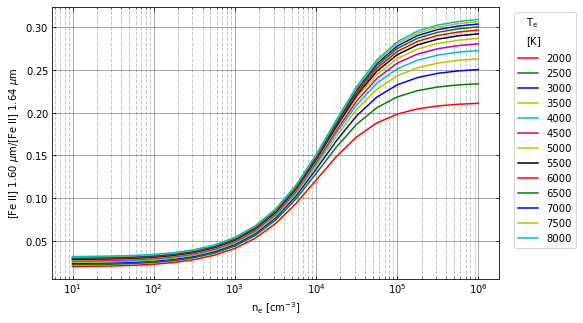

In [26]:
nax1clip = [2000,8000]*u.Unit("K")
mp.isoplot("FEII_1.60/FEII_1.64",plotnaxis=1,logx=True,nax_clip=nax1clip)

You can skip every `n-th` isoline with the `step` keyword.  The default is `step=1` which selects every isoline between the `nax_clip` limits.  Here we plot every other isoline.

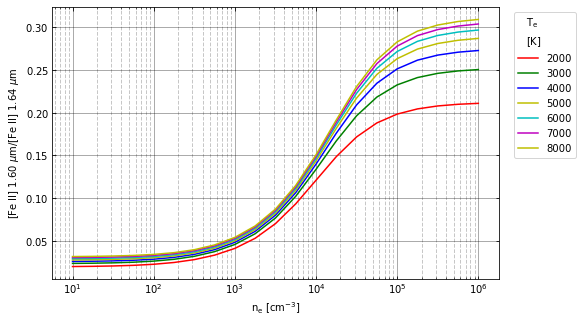

In [27]:
mp.isoplot("FEII_1.60/FEII_1.64",plotnaxis=1,logx=True,nax_clip=nax1clip,step=2)

And plotting the other `NAXIS` $n_e$:

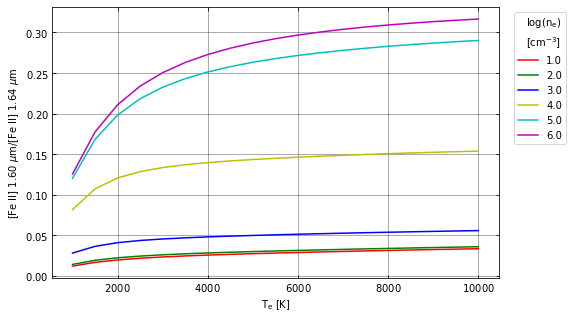

In [28]:
nax2clip = [0,1E8]*u.Unit("cm-3")
mp.isoplot("FEII_1.60/FEII_1.64",plotnaxis=2,logx=False,nax_clip=nax2clip)

#### An example with a (density,radiation field) intensity model, and changing the radiation field units.

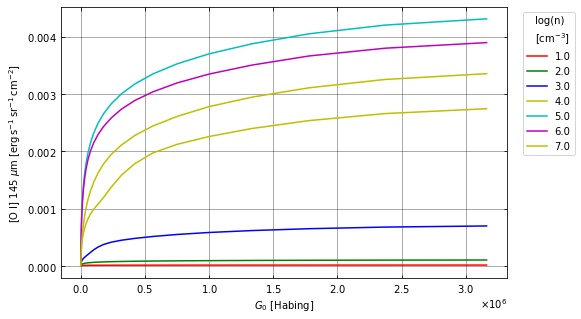

In [29]:
mp.isoplot("OI_145",plotnaxis=1,logx=False,nax_clip=nax2clip,xaxis_unit="Habing")

#### You can similarly change the Y axis units

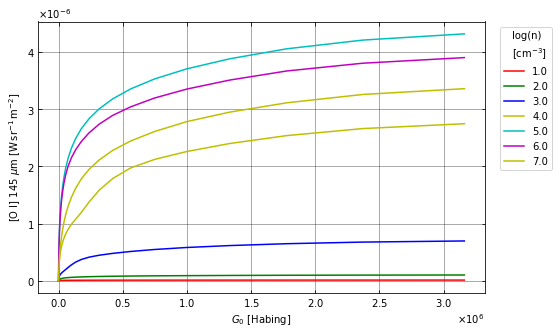

In [30]:
mp.isoplot("OI_145",plotnaxis=1,logx=False,nax_clip=nax2clip,xaxis_unit="Habing",yaxis_unit="W m-2 sr-1")